In [2]:
#!pip install praw

# Authentication

In [3]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="BB3Y91DIn_izYlWCqIM2xw",
    client_secret="p-GNweZQhLOKHVq1Zf4XhbrlZ2vC0Q",
    user_agent=user_agent
)

In [5]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

The **"bitcoin"** subreddit channel will be use for this project

In [38]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Bitcoin Newcomers FAQ - Please read!
16bm9de
BitcoinFan7
1694011779.0
199
0.95
https://www.reddit.com/r/Bitcoin/comments/16bm9de/bitcoin_newcomers_faq_please_read/
0


**Get total comment in Subreddit**

In [39]:
headlines = set()
for submission in reddit.subreddit("bitcoin").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

787


In [58]:
#Create a dataframe from the scrapped data 
bitcoin_df = pd.DataFrame(headlines)
bitcoin_df.head()

,0
0,Hello from the year 2100
1,Why Bitcoin Will 10X and Flip Gold | Cathie Wo...
2,Bitcoin mining firm Core Scientific mined $812...
3,"""With support of miniscript on taproot (and Mu..."
4,Zero-knowledge proofs on the Bitcoin testnet!


In [72]:
df = df.iloc[:, 1:]
bitcoin_df.head()

,text
0,Hello from the year 2100
1,Why Bitcoin Will 10X and Flip Gold | Cathie Wo...
2,Bitcoin mining firm Core Scientific mined $812...
3,"""With support of miniscript on taproot (and Mu..."
4,Zero-knowledge proofs on the Bitcoin testnet!


In [73]:
bitcoin_df.columns

Index(['text'], dtype='object')

In [75]:
bitcoin_df.columns = ['Titles']

In [78]:
bitcoin_df.head()

,Titles
0,Hello from the year 2100
1,Why Bitcoin Will 10X and Flip Gold | Cathie Wo...
2,Bitcoin mining firm Core Scientific mined $812...
3,"""With support of miniscript on taproot (and Mu..."
4,Zero-knowledge proofs on the Bitcoin testnet!


In [80]:
bitcoin_df.Titles.duplicated().sum() 

0

In [82]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(cleanTxt)

#Show the clean text
bitcoin_df.head()

,Titles
0,Hello from the year 2100
1,Why Bitcoin Will 10X and Flip Gold | Cathie Wo...
2,Bitcoin mining firm Core Scientific mined $812...
3,"""With support of miniscript on taproot (and Mu..."
4,Zero-knowledge proofs on the Bitcoin testnet!


In [83]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
bitcoin_df["Titles"]= bitcoin_df["Titles"].apply(remove_emoji)

#Show the clean text
bitcoin_df.head()

,Titles
0,Hello from the year 2100
1,Why Bitcoin Will 10X and Flip Gold | Cathie Wo...
2,Bitcoin mining firm Core Scientific mined $812...
3,"""With support of miniscript on taproot (and Mu..."
4,Zero-knowledge proofs on the Bitcoin testnet!


In [87]:
#!pip install textblob

In [88]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [91]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
bitcoin_df['Subjectivity'] = bitcoin_df['Titles'].apply(getSubjectivity)
bitcoin_df['Polarity'] = bitcoin_df['Titles'].apply(getPolarity)

#Now display data
bitcoin_df.head()

,Titles,Subjectivity,Polarity
0,Hello from the year 2100,0.000000,0.000000
1,Why Bitcoin Will 10X and Flip Gold | Cathie Wo...,0.000000,0.000000
2,Bitcoin mining firm Core Scientific mined $812...,0.250000,0.050000
3,"""With support of miniscript on taproot (and Mu...",0.727273,0.218182
4,Zero-knowledge proofs on the Bitcoin testnet!,0.000000,0.000000


In [ ]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
bitcoin_df["Insight"] = bitcoin_df["Polarity"].apply(getInsight)

bitcoin_df.head(50)

# Data Visualization

In [95]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

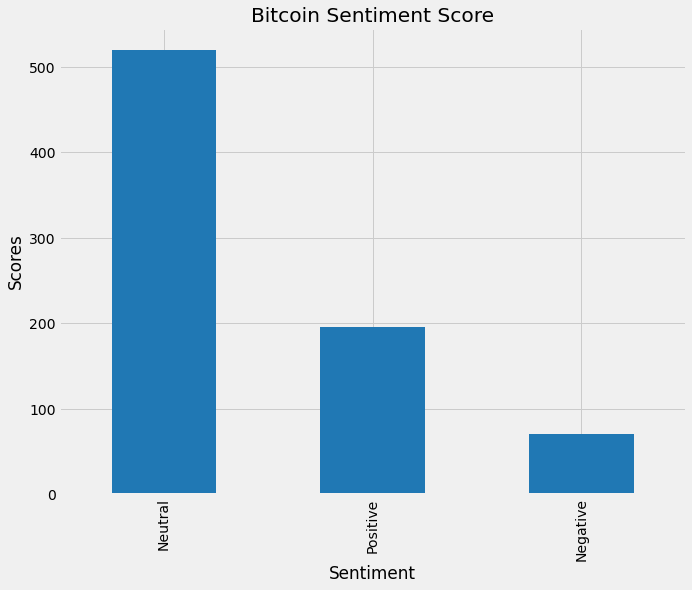

In [97]:
#Plot the values count of sentiment
plt.title("Bitcoin Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
bitcoin_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

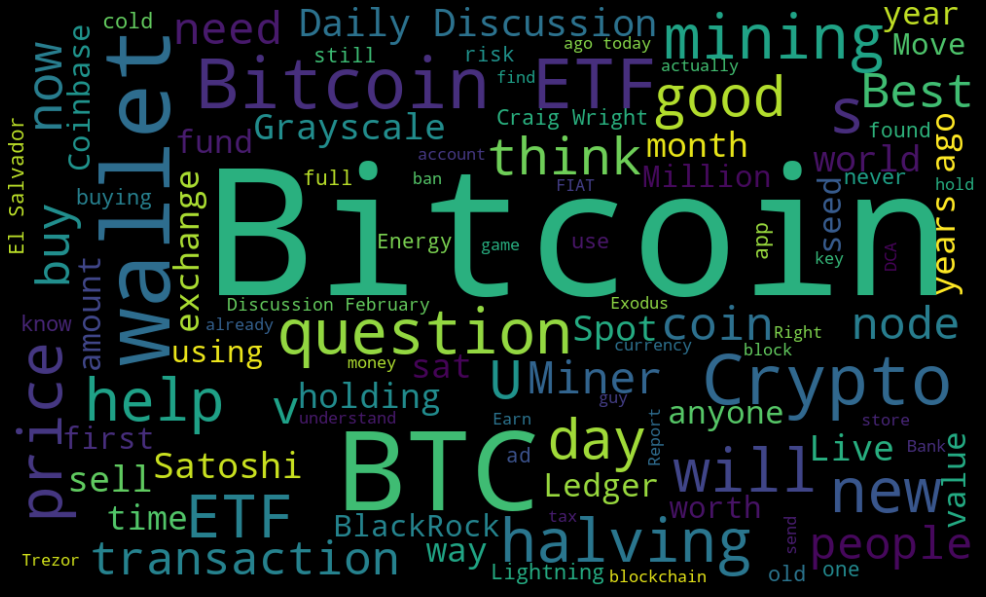

In [100]:
text = ' '.join( [twts for twts in bitcoin_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");